In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('Healthcare Providers.csv') 
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [ ]:
df.columns

Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

In [ ]:
DropCols = ['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider','Zip Code of the Provider','HCPCS Code']

In [ ]:
df = df.drop(DropCols, axis = 1)
df

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,IL,US,Physical Therapist in Private Practice,Y,O,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,ARNP,F,I,REDMOND,OR,US,Nurse Practitioner,Y,O,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,M.D.,M,I,SAINT LOUIS,MO,US,Cardiology,Y,F,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,NaN,F,I,LARCHMONT,NY,US,Internal Medicine,Y,O,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [ ]:
df.isnull().sum()

Credentials of the Provider                                 7209
Gender of the Provider                                      4254
Entity Type of the Provider                                    0
City of the Provider                                           0
State Code of the Provider                                     0
Country Code of the Provider                                   0
Provider Type                                                  0
Medicare Participation Indicator                               0
Place of Service                                               0
HCPCS Description                                              0
HCPCS Drug Indicator                                           0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge 

<Axes: >

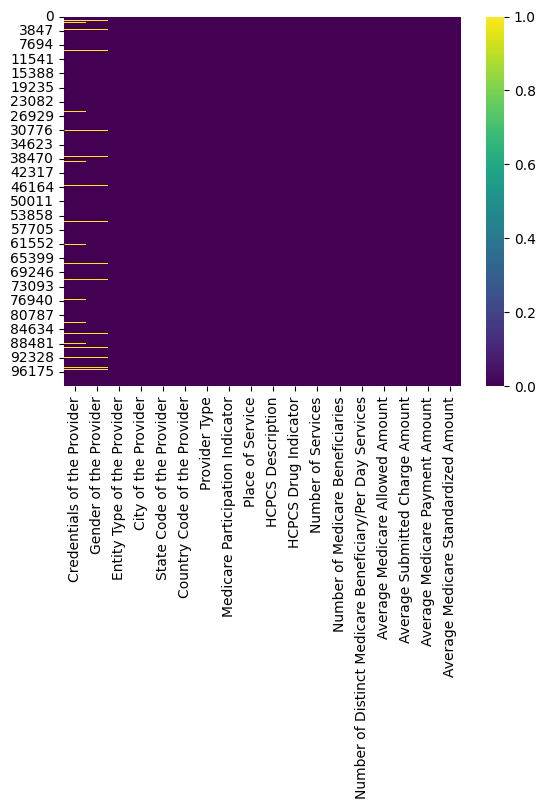

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

In [ ]:
df.dtypes

Credentials of the Provider                                 object
Gender of the Provider                                      object
Entity Type of the Provider                                 object
City of the Provider                                        object
State Code of the Provider                                  object
Country Code of the Provider                                object
Provider Type                                               object
Medicare Participation Indicator                            object
Place of Service                                            object
HCPCS Description                                           object
HCPCS Drug Indicator                                        object
Number of Services                                          object
Number of Medicare Beneficiaries                            object
Number of Distinct Medicare Beneficiary/Per Day Services    object
Average Medicare Allowed Amount                             ob

In [ ]:
df.describe()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,92791,95746,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,1854,2,2,5846,58,4,90,2,2,2455,2,2748,1274,1979,49629,38088,83367,76237
top,MD,M,I,NEW YORK,CA,US,Diagnostic Radiology,Y,O,Established patient office or other outpatient...,N,13,11,12,3,150,2.94,25.32
freq,32874,66641,95746,1061,7775,99994,12537,99969,61616,4578,93802,3018,4791,3210,1017,970,623,1630


[1854 2 2 5846 58 4 90 2 2 2455 2 2748 1274 1979 49629 38088 83367 76237]
['Credentials of the Provider' 'Gender of the Provider'
 'Entity Type of the Provider' 'City of the Provider'
 'State Code of the Provider' 'Country Code of the Provider'
 'Provider Type' 'Medicare Participation Indicator' 'Place of Service'
 'HCPCS Description' 'HCPCS Drug Indicator' 'Number of Services'
 'Number of Medicare Beneficiaries'
 'Number of Distinct Medicare Beneficiary/Per Day Services'
 'Average Medicare Allowed Amount' 'Average Submitted Charge Amount'
 'Average Medicare Payment Amount' 'Average Medicare Standardized Amount']


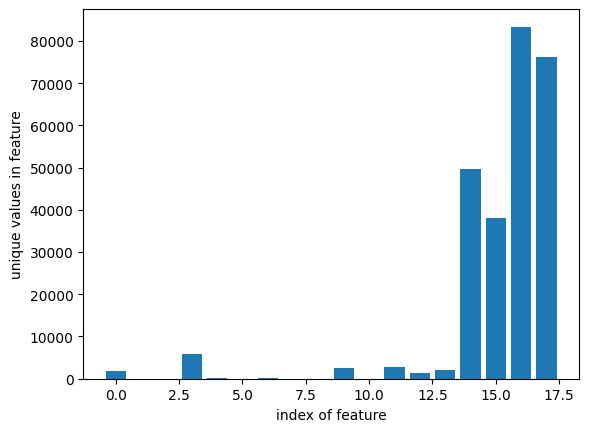

In [ ]:
unique_freq=df.describe().iloc[1]
print(np.array(unique_freq))
columns_=df.columns
print(np.array(columns_))
col_idx=[]
for i in range(0,18):
  col_idx.append(i)

plt.bar(col_idx,np.array(unique_freq),label='number of unique values')
plt.xlabel('index of feature')
plt.ylabel('unique values in feature')
plt.show()

In [ ]:
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [ ]:
df.isnull().sum()

Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
City of the Provider                                        0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average 

In [ ]:
column_names = df.columns.values.astype(str)
print(column_names)

['Credentials of the Provider' 'Gender of the Provider'
 'Entity Type of the Provider' 'City of the Provider'
 'State Code of the Provider' 'Country Code of the Provider'
 'Provider Type' 'Medicare Participation Indicator' 'Place of Service'
 'HCPCS Description' 'HCPCS Drug Indicator' 'Number of Services'
 'Number of Medicare Beneficiaries'
 'Number of Distinct Medicare Beneficiary/Per Day Services'
 'Average Medicare Allowed Amount' 'Average Submitted Charge Amount'
 'Average Medicare Payment Amount' 'Average Medicare Standardized Amount']


In [ ]:
for x in column_names:
  print(x)
  print(df[x].value_counts())

Credentials of the Provider
MD                    40083
M.D.                  32757
D.O.                   3533
DO                     2478
PA-C                   1859
                      ...  
DPT MFS                   1
PT, CERT. MDT, NCS        1
MD FAAFP FACEP            1
PT, DPT, MS               1
PT,DPTATC                 1
Name: Credentials of the Provider, Length: 1854, dtype: int64
Gender of the Provider
M    70895
F    29105
Name: Gender of the Provider, dtype: int64
Entity Type of the Provider
I    95746
O     4254
Name: Entity Type of the Provider, dtype: int64
City of the Provider
NEW YORK          1061
HOUSTON            874
CHICAGO            759
PHILADELPHIA       658
BOSTON             634
                  ... 
PASS CHRISTIAN       1
BLUFF CITY           1
HAWLEY               1
PEYTON               1
HOOPER BAY           1
Name: City of the Provider, Length: 5846, dtype: int64
State Code of the Provider
CA    7775
FL    7263
TX    6861
NY    6361
PA    4561
IL   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

In [ ]:
arr=['Number of Services', 'Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']
for x in arr:
  df[x] = df[x].str.replace(',', '')
df  

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,IL,US,Physical Therapist in Private Practice,Y,O,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,ARNP,F,I,REDMOND,OR,US,Nurse Practitioner,Y,O,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,M.D.,M,I,SAINT LOUIS,MO,US,Cardiology,Y,F,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,MD,F,I,LARCHMONT,NY,US,Internal Medicine,Y,O,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

In [ ]:
arr=['Number of Services', 'Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']
for x in arr:
  df[x] = df[x].astype(float)
df

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,IL,US,Physical Therapist in Private Practice,Y,O,"Evaluation of physical therapy, typically 30 m...",N,20.0,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,ARNP,F,I,REDMOND,OR,US,Nurse Practitioner,Y,O,Established patient office or other outpatient...,N,136.0,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,M.D.,M,I,SAINT LOUIS,MO,US,Cardiology,Y,F,"Doppler ultrasound study of heart blood flow, ...",N,11.0,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,MD,F,I,LARCHMONT,NY,US,Internal Medicine,Y,O,Administration of influenza virus vaccine,N,12.0,12.0,12.0,30.540000,65.000000,29.930000,25.320000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  object 
 1   Gender of the Provider                                    100000 non-null  object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Country Code of the Provider                              100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Place

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,667,0,0,4541,28,3,39,1,0,967,0,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,667,0,0,1624,31,3,54,1,1,2054,0,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,438,1,0,3666,9,3,71,1,1,665,0,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,956,1,0,2522,28,3,39,1,1,2330,0,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,410,1,0,2508,12,3,39,1,1,973,0,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1594,0,0,5709,18,3,68,1,1,700,0,20.0,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,145,0,0,4313,41,3,53,1,1,669,0,136.0,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,667,1,0,4541,28,3,10,1,0,623,0,11.0,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,956,0,0,2746,38,3,39,1,1,15,0,12.0,12.0,12.0,30.540000,65.000000,29.930000,25.320000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  int64  
 1   Gender of the Provider                                    100000 non-null  int64  
 2   Entity Type of the Provider                               100000 non-null  int64  
 3   City of the Provider                                      100000 non-null  int64  
 4   State Code of the Provider                                100000 non-null  int64  
 5   Country Code of the Provider                              100000 non-null  int64  
 6   Provider Type                                             100000 non-null  int64  
 7   Medicare Participation Indicator                          100000 non-null  int64  
 8   Place

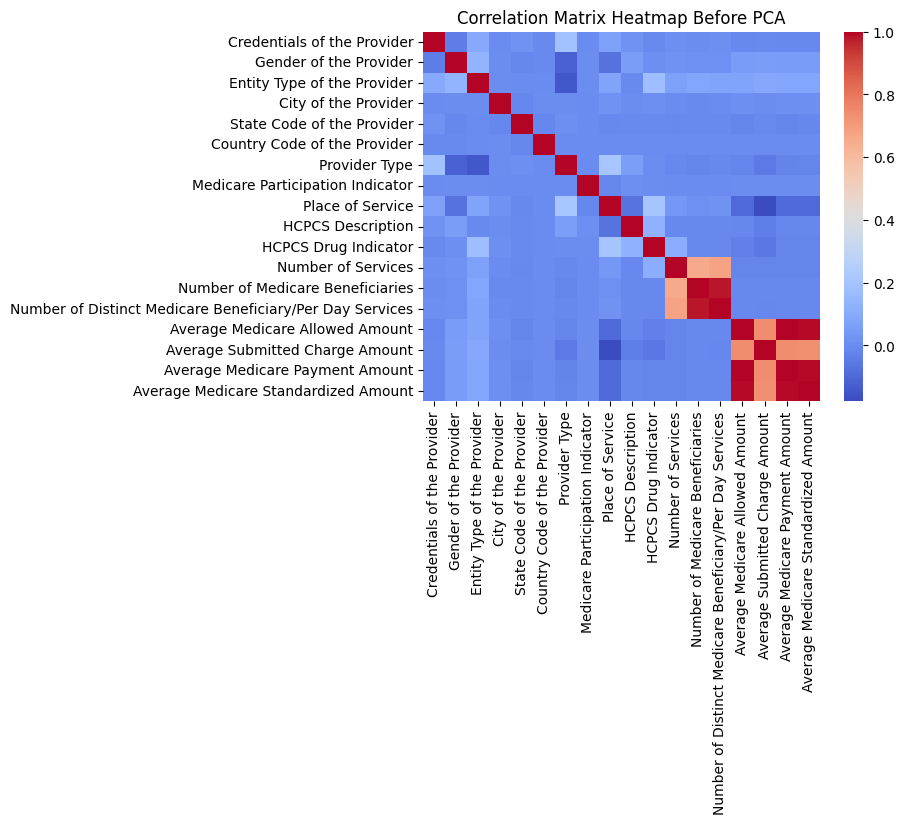

In [ ]:
corr_matrix = df.corr()

# Create the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=False,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap Before PCA')
plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components)
print("Percentage of variance retained:", sum(pca.explained_variance_ratio_))
df_pca

Percentage of variance retained: 0.9559177897103193


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.652192,-0.214437,-0.589485,1.046491,0.224693,-0.595678,-0.204911,0.084049,0.561363,-0.722596,1.402653,0.031086,-0.735831
1,0.192866,-0.026340,0.946638,0.894252,-0.506312,-0.490720,1.165660,-0.272890,-0.396010,-0.142874,0.579826,-1.236517,0.130554
2,-0.237738,-0.147711,0.376621,0.400326,0.619292,-1.427151,-0.258407,0.035607,0.531893,0.729024,-1.590804,-0.368264,-0.945362
3,-0.785513,-0.150307,0.399145,-0.394259,-1.176834,0.064769,-0.085851,0.170771,-0.206068,0.194324,-0.507476,-0.591397,0.998853
4,-0.595347,-0.127981,-0.490131,-0.228264,0.599622,-1.184749,0.315361,-0.135450,0.133131,0.772963,-1.086793,-0.482917,0.022541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.359212,-0.171522,2.420375,1.560744,0.516054,0.187033,-2.055944,0.384079,0.841185,0.215912,1.091949,0.381240,0.291292
99996,-0.537762,-0.115365,0.082324,1.021578,1.327521,-1.166747,1.030600,-0.201801,0.725017,-1.586355,-0.075081,-1.099141,-0.839803
99997,-0.385232,-0.173699,-2.006329,-0.367875,0.494467,-0.100334,-0.726445,0.219727,0.595601,-0.452523,0.160798,0.713329,0.009518
99998,-0.651150,-0.185614,0.691838,1.153926,1.791655,0.535693,0.222277,-0.359748,0.068536,-0.403603,0.671158,0.083745,0.273047


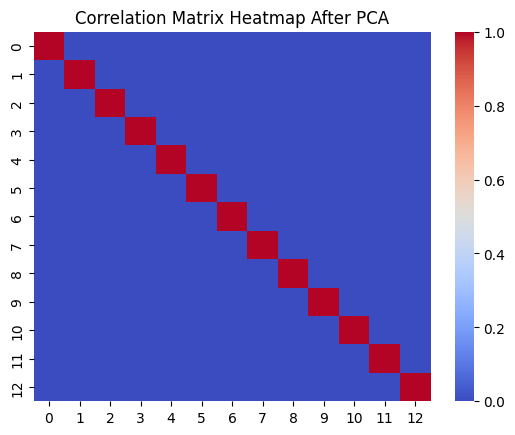

In [ ]:
corr_matrix = df_pca.corr()

# Create the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap After PCA')
plt.show()


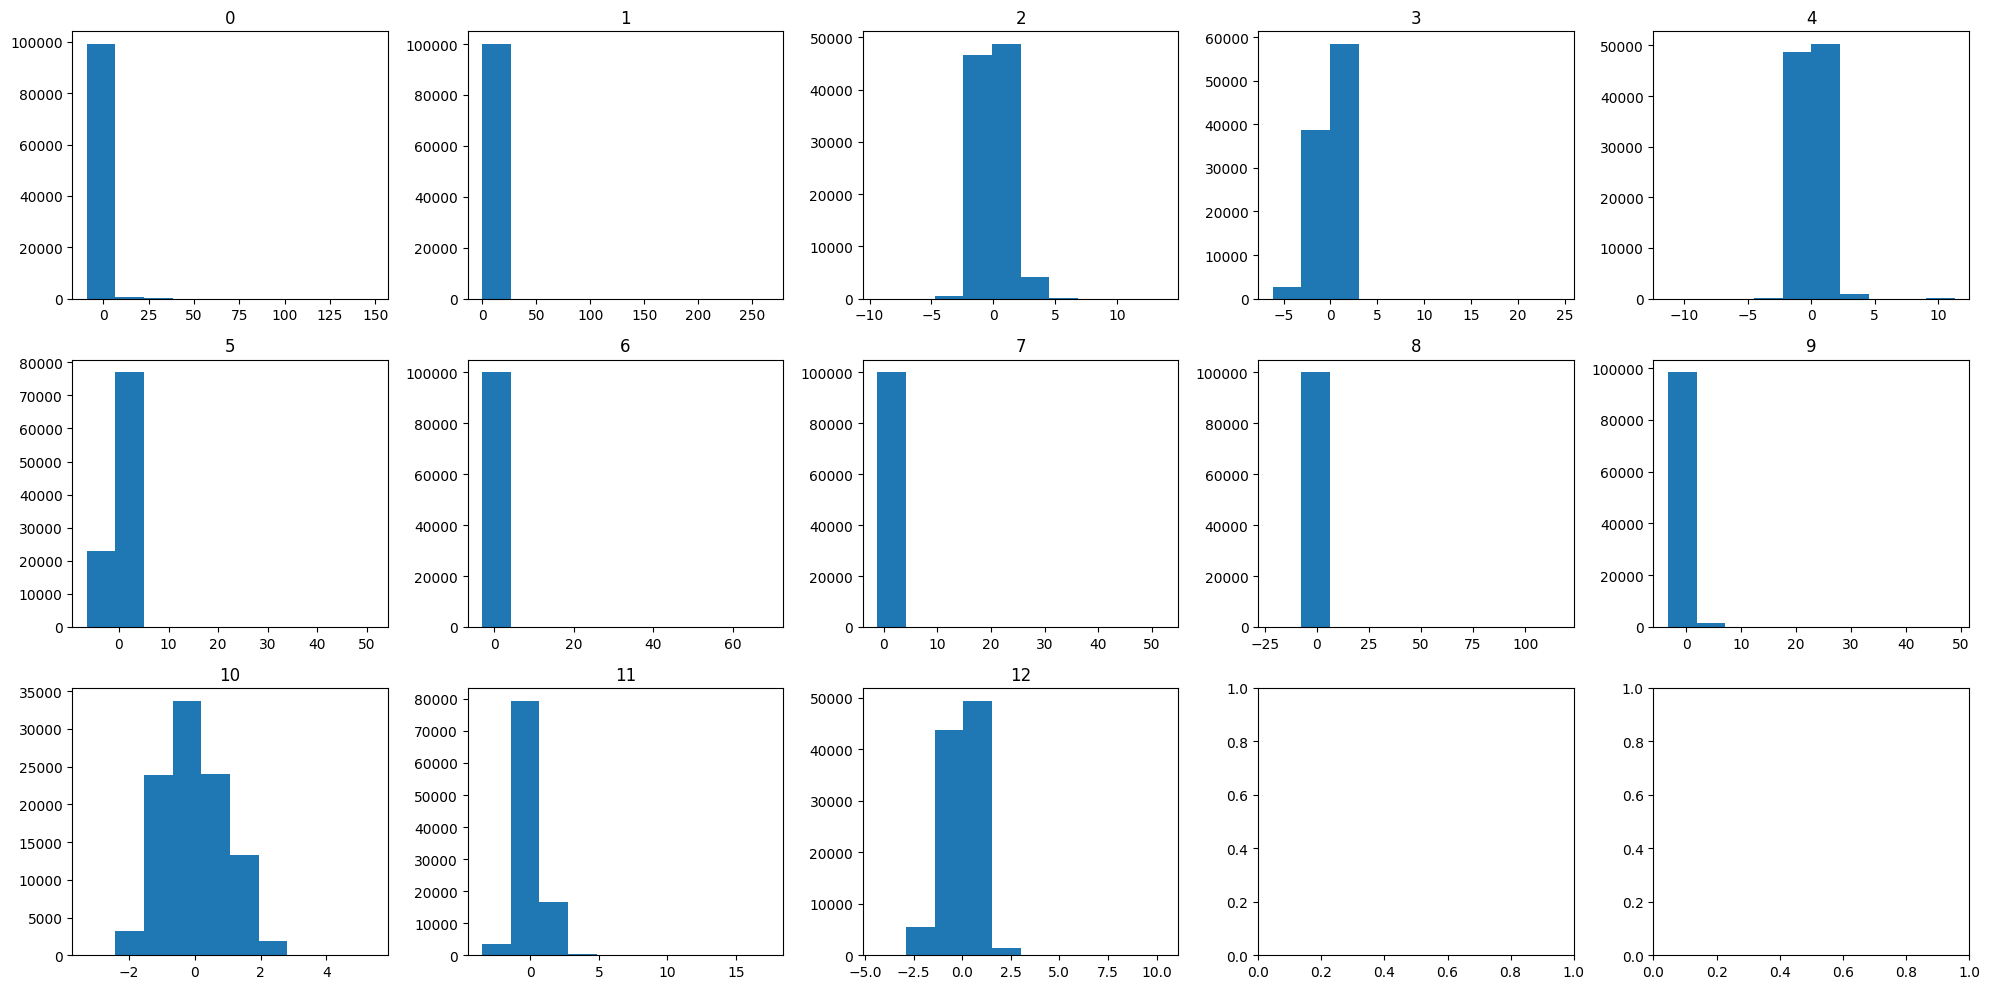

In [ ]:
data = df_pca

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
for i, col in enumerate(data.columns):
    axs[int(i/5), i%5].hist(data[col])
    axs[int(i/5), i%5].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_pcan = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns)

# Print the normalized data
print(df_pcan)

             0         1         2         3         4         5         6   \
0      0.341015 -0.133768 -0.500539  0.916542  0.217394 -0.583810 -0.204231   
1      0.100845 -0.016431  0.803803  0.783208 -0.489864 -0.480943  1.161791   
2     -0.124307 -0.092143  0.319794  0.350615  0.599174 -1.398717 -0.257549   
3     -0.410725 -0.093763  0.338919 -0.345302 -1.138605  0.063479 -0.085566   
4     -0.311292 -0.079836 -0.416176 -0.199919  0.580143 -1.161144  0.314314   
...         ...       ...       ...       ...       ...       ...       ...   
99995 -0.187823 -0.106998  2.055171  1.366937  0.499290  0.183307 -2.049120   
99996 -0.281182 -0.071966  0.069902  0.894722  1.284397 -1.143501  1.027179   
99997 -0.201428 -0.108355 -1.703600 -0.322194  0.478405 -0.098335 -0.724034   
99998 -0.340470 -0.115788  0.587448  1.010636  1.733453  0.525020  0.221539   
99999 -0.385286  0.075026  1.395377  1.017057 -0.923731  0.176057  0.674276   

             7         8         9         10      

In [ ]:
df_pcan.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,7.034373e-18,2.344791e-18,-1.733724e-17,-1.115552e-17,-3.765876e-17,7.531753e-18,1.676881e-17,3.517187e-18,-1.257661e-17,-1.204370e-17,1.371347e-17,1.449507e-17,5.755396e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.822853e+00,-2.141717e-01,-7.963992e+00,-5.412151e+00,-1.092798e+01,-6.379595e+00,-3.108821e+00,-1.231739e+00,-2.135808e+01,-3.410368e+00,-3.519845e+00,-4.230312e+00,-5.513887e+00
25%,-2.995690e-01,-1.056308e-01,-7.766982e-01,-3.184458e-01,-7.692281e-01,-6.473532e-01,-6.300567e-01,-2.467860e-01,-4.874750e-01,-7.140063e-01,-7.728242e-01,-5.826459e-01,-6.599835e-01
50%,-1.597721e-01,-7.262765e-02,-2.648292e-02,8.211124e-02,4.373918e-02,7.465130e-03,-2.733726e-02,-1.619268e-02,1.040840e-02,2.123678e-02,-7.171936e-02,-2.742434e-02,9.202525e-02
75%,4.983553e-02,-1.032720e-02,6.155345e-01,6.155946e-01,7.252699e-01,6.408717e-01,5.929369e-01,2.170695e-01,4.712144e-01,7.103172e-01,7.223419e-01,5.170229e-01,6.665288e-01
max,7.795802e+01,1.653842e+02,1.172709e+01,2.138795e+01,1.094801e+01,5.032844e+01,6.876315e+01,5.231708e+01,1.167574e+02,4.943846e+01,5.816942e+00,2.082438e+01,1.310694e+01


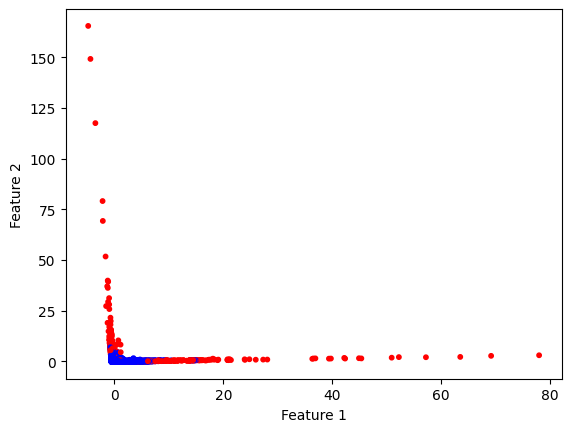

Number of anomalies detected: 458


In [ ]:
from sklearn.neighbors import NearestNeighbors
X = df_pcan
k = 5 
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Find distances to k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)

# Set threshold for anomaly detection
threshold = np.mean(distances[:, k-1]) + 2*np.std(distances[:, k-1])

# Flag anomalies
anomaly_flags = distances[:, k-1] > threshold

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.where(anomaly_flags, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of anomalies detected
print(f"Number of anomalies detected: {np.sum(anomaly_flags)}")

In [ ]:
X = df_pcan
for i in X.iloc[:, 0].values:
  if (i>60):
    print(i)

69.14754425616334
77.9580159825573
63.48257150502382


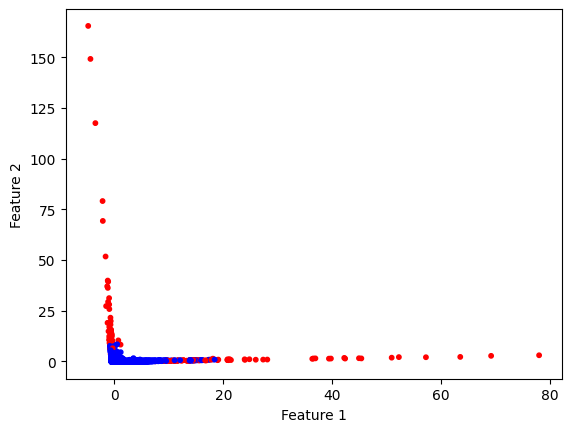

Number of anomalies detected: 144


In [ ]:
k = 7 
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Find distances to k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)

# Set threshold for anomaly detection
threshold = np.mean(distances[:, k-1]) + 2*np.std(distances[:, k-1])

# Flag anomalies
anomaly_flags = distances[:, k-1] > threshold

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.where(anomaly_flags, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of anomalies detected
print(f"Number of anomalies detected: {np.sum(anomaly_flags)}")

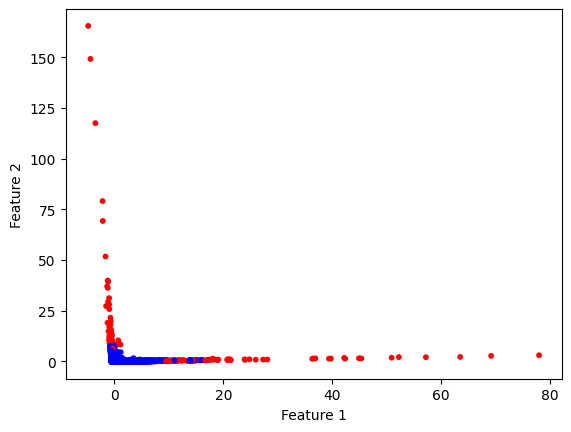

Number of anomalies detected: 166


In [ ]:
k = 9 
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Find distances to k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)

# Set threshold for anomaly detection
threshold = np.mean(distances[:, k-1]) + 2*np.std(distances[:, k-1])

# Flag anomalies
anomaly_flags = distances[:, k-1] > threshold

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.where(anomaly_flags, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of anomalies detected
print(f"Number of anomalies detected: {np.sum(anomaly_flags)}")

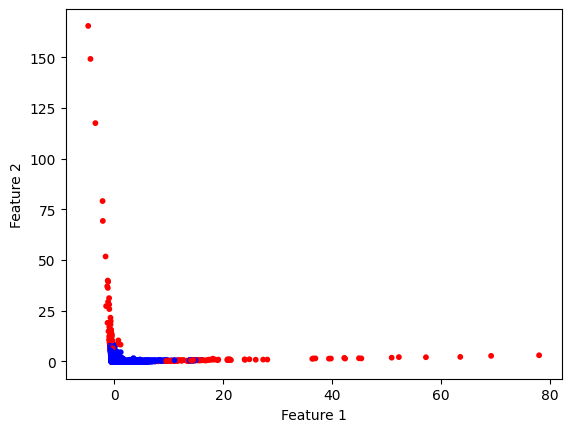

Number of anomalies detected: 179


In [ ]:
k = 11 
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Find distances to k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)

# Set threshold for anomaly detection
threshold = np.mean(distances[:, k-1]) + 2*np.std(distances[:, k-1])

# Flag anomalies
anomaly_flags = distances[:, k-1] > threshold

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.where(anomaly_flags, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of anomalies detected
print(f"Number of anomalies detected: {np.sum(anomaly_flags)}")

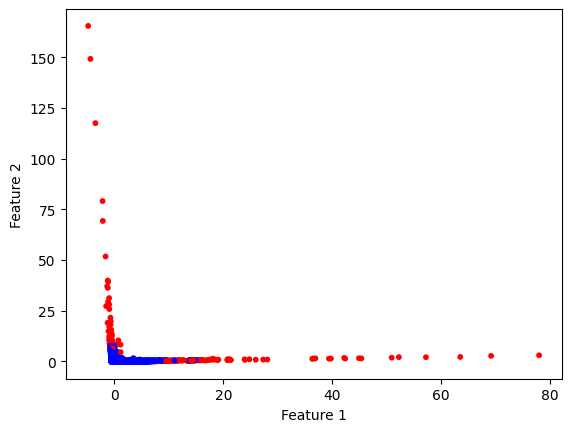

Number of anomalies detected: 189


In [ ]:
k = 13 
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Find distances to k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)

# Set threshold for anomaly detection
threshold = np.mean(distances[:, k-1]) + 2*np.std(distances[:, k-1])

# Flag anomalies
anomaly_flags = distances[:, k-1] > threshold

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.where(anomaly_flags, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of anomalies detected
print(f"Number of anomalies detected: {np.sum(anomaly_flags)}")


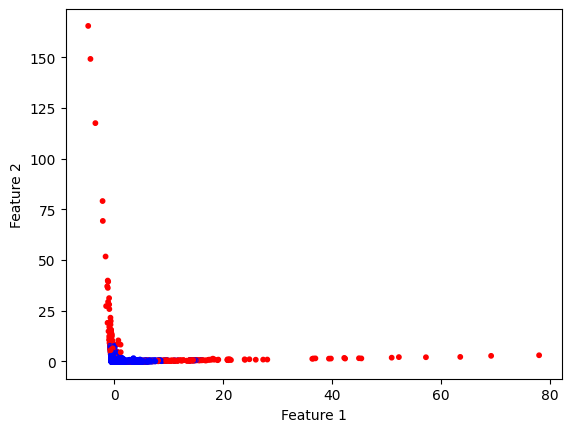

Number of anomalies detected: 508


In [ ]:
from sklearn.svm import OneClassSVM

# Train a One-Class SVM model on the data
svm = OneClassSVM(nu=0.005, kernel='rbf', gamma=0.1)
svm.fit(df_pcan)

# Predict the outliers using the One-Class SVM model
anomaly_flags = svm.predict(df_pcan) == -1

plt.scatter(df_pcan.iloc[:, 0], df_pcan.iloc[:, 1], c=np.where(anomaly_flags, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print the number of anomalies detected
print(f"Number of anomalies detected: {anomaly_flags.sum()}")


In [ ]:
anomaly_indices = np.where(svm.predict(df_pcan) == -1)[0]

# Print the indices of the anomalies
print("Indices of anomalies:", anomaly_indices)

Indices of anomalies: [  259   309   375   439   535   563   609   887  1122  1564  1738  1939
  1983  2184  2247  2491  2926  3153  3578  3690  3836  4041  4159  4259
  4686  4833  4872  5056  5103  5183  5374  5690  5734  6403  6593  6809
  7291  7321  7867  8012  8091  8122  8278  8526  8575  8783  9001  9262
  9414  9955 10424 10464 10851 10929 11011 11548 11585 11825 12038 12061
 12313 12389 12651 12865 13026 13086 13168 13474 13686 13714 14041 14341
 14437 14441 15247 15338 16862 16870 16881 16895 16940 17113 17162 17305
 17309 17412 17835 18215 18376 18438 18540 18638 18992 19173 19443 19915
 20027 20088 20196 20372 20424 20527 21073 21448 21537 21614 21847 21880
 22125 22426 22498 22499 22600 23048 23502 23583 23685 23725 23735 23783
 23901 24103 24775 24936 25231 26176 26185 26336 26373 26466 26543 26834
 27005 27207 27408 27668 27761 27814 27997 29696 29750 29836 30054 30194
 30333 30431 30481 30517 30745 30787 30820 31167 31246 31302 31746 31926
 32151 32178 32287 32501 3298

In [ ]:
anomaly_svm = df_pcan.iloc[anomaly_indices]
anomaly_svm

,0,1,2,3,4,5,6,7,8,9,10,11,12
259,-0.393935,-0.125999,0.123295,-0.328169,-7.789426,32.232550,44.081197,29.721079,78.859224,30.915390,3.828103,-1.258177,1.113031
309,-0.222997,-0.060627,-1.366243,-0.571242,2.091723,-1.996438,-0.454882,0.093481,1.296368,0.008652,-0.881424,-0.200310,0.478599
375,11.100168,0.332947,2.478845,1.178797,0.672562,-1.724301,-0.367429,0.163078,0.793810,0.521532,-1.483349,0.253330,1.597506
439,14.324247,0.590301,4.387965,0.047979,0.561750,-1.543039,3.802124,-0.861460,-0.539439,-1.562654,0.869880,2.193969,2.984542
535,-0.269815,0.318439,1.519433,-5.088353,-0.106396,1.840173,1.530484,-0.517312,-1.267449,-0.667030,1.562957,-0.629597,-0.914296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99855,-0.123577,-0.004484,-0.545512,0.106191,1.686763,-2.298729,-0.281623,0.073973,1.241759,0.196666,-1.787519,-0.496215,-1.311188
99872,-0.705442,5.567785,2.838636,-1.281817,-0.608132,-1.321641,1.469655,-0.081902,0.431527,-1.668889,-0.671114,6.538983,-2.041157
99914,12.052999,0.658316,0.935250,-2.121529,0.831111,-0.023395,-1.090471,0.146360,0.236879,0.838264,1.499161,-1.983267,0.133505
99932,63.482572,2.256164,9.828017,4.541862,0.198737,-4.625579,5.825445,-0.608010,0.197041,-2.746163,-2.837312,-0.366730,11.208845


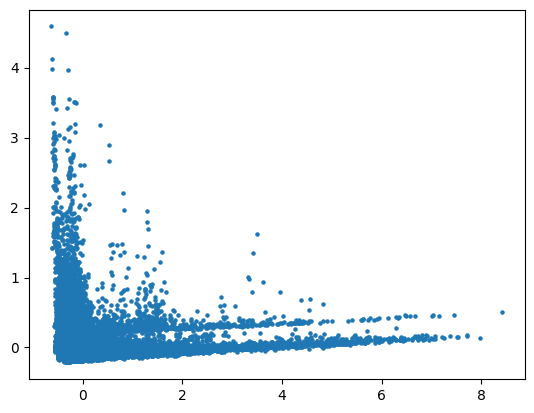

In [ ]:
X=df_pcan
clf = OneClassSVM(kernel='rbf', nu=0.01)
clf.fit(X)

# Use the trained model to predict the labels of the data points
y_pred = clf.predict(X)

# Remove the anomalies from the dataset
X_clean = X.iloc[y_pred == 1, :]

# Plot the cleaned dataset
import matplotlib.pyplot as plt
plt.scatter(X_clean.iloc[:, 0], X_clean.iloc[:, 1], s=5)
plt.show()

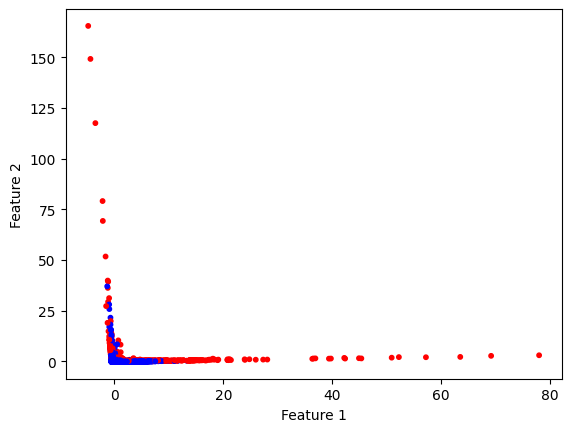

Number of anomalies detected: 1000


In [ ]:
from sklearn.ensemble import IsolationForest

# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
model.fit(df_pcan)

# Predict anomaly scores for each data point
anomaly_scores = model.score_samples(df_pcan)

# Set threshold for anomaly detection
threshold = np.quantile(anomaly_scores, 0.01)

# Flag anomalies
anomaly_flags_if = anomaly_scores < threshold

plt.scatter(df_pcan.iloc[:, 0], df_pcan.iloc[:, 1], c=np.where(anomaly_flags_if, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print number of anomalies detected
print(f"Number of anomalies detected: {np.sum(anomaly_flags_if)}")


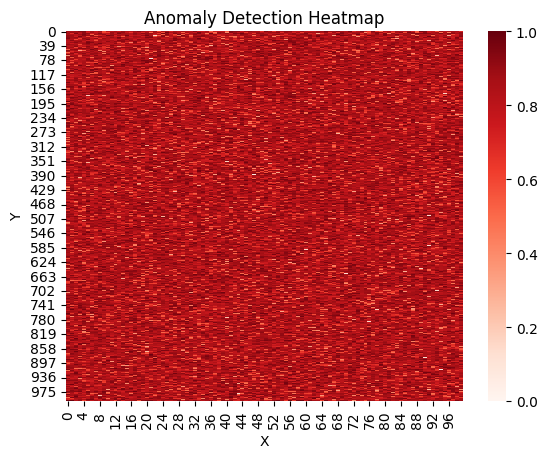

In [ ]:
y_pred = model.predict(X)

# Create heatmap of anomaly scores
scores = model.decision_function(df_pcan)
score_max = np.max(scores)
score_min = np.min(scores)
scores_normalized = (scores - score_min) / (score_max - score_min)
heatmap_data = np.reshape(scores_normalized, (1000, 100))
sns.heatmap(heatmap_data, cmap='Reds')
plt.title('Anomaly Detection Heatmap')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


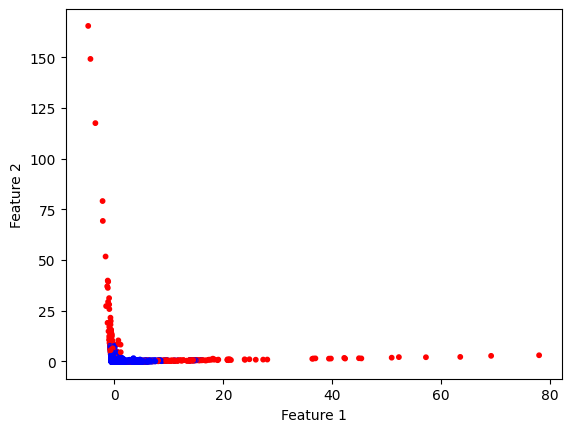

Number of anomalies detected: 508


In [ ]:
from sklearn.svm import OneClassSVM

# Train a One-Class SVM model on the data
svm = OneClassSVM(nu=0.005, kernel='rbf', gamma=0.1)
svm.fit(df_pcan)

# Predict the outliers using the One-Class SVM model
anomaly_flags = svm.predict(df_pcan) == -1

plt.scatter(df_pcan.iloc[:, 0], df_pcan.iloc[:, 1], c=np.where(anomaly_flags, 'r', 'b'),s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print the number of anomalies detected
print(f"Number of anomalies detected: {anomaly_flags.sum()}")

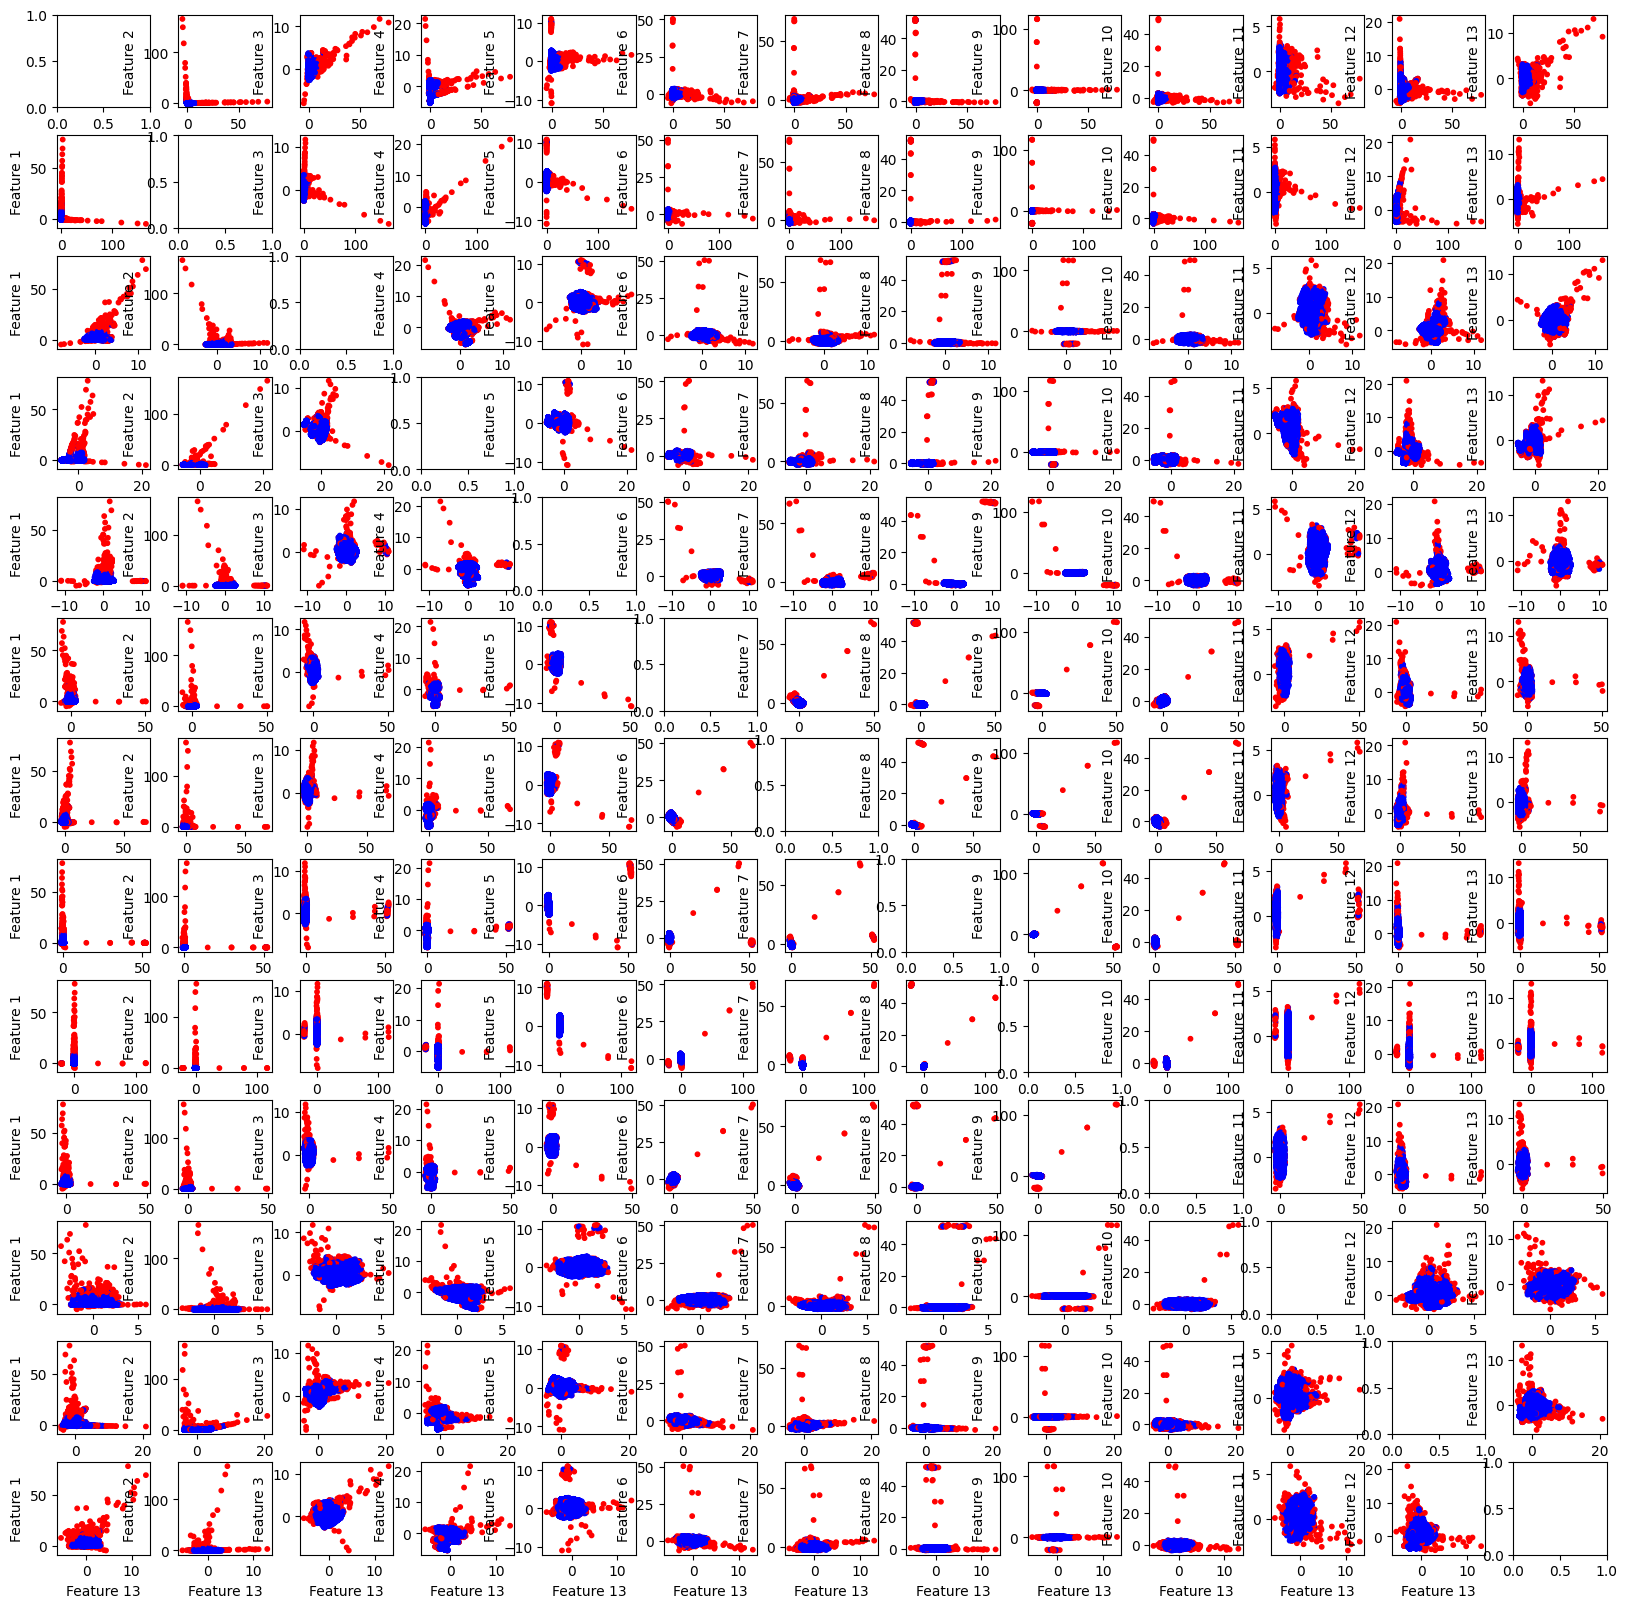

In [ ]:
# Create a 13x13 grid of subplots
fig, axs = plt.subplots(13, 13, figsize=(20, 20))

# Loop over all possible pairs of two features
for i in range(0, 13):
    for j in range(0, 13):
        if i != j:
            # Scatter plot the two features with red points for anomaly_flags and blue points otherwise
            axs[i, j].scatter(df_pcan.iloc[:, i], df_pcan.iloc[:, j], c=np.where(anomaly_flags, 'r', 'b'), s=10)
            axs[i, j].set_xlabel('Feature ' + str(i + 1))
            axs[i, j].set_ylabel('Feature ' + str(j + 1))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

In [ ]:
data=df_pcan
threshold=3
print(data.columns)
z_scores = np.abs(data - data.mean()) / data.std()

# Threshold for identifying anomalies
threshold = 3

# Find the indices of anomalies
anomaly_indices = np.where(z_scores > threshold)
print(anomaly_indices[0])
print(anomaly_indices[1])
# Print the anomalies
# anomalies = data.iloc[anomaly_indices]
# print(anomalies)

RangeIndex(start=0, stop=13, step=1)
[    9     9    40 ... 99932 99932 99932]
[ 3 11  3 ...  5  6 12]


In [ ]:
anomaly_col=anomaly_indices[1]
anomaly_row=anomaly_indices[0]
anomaly_f0=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==0:
    anomaly_f0.append(anomaly_row[i])
print(anomaly_f0)
print(len(anomaly_f0))


[122, 175, 221, 340, 375, 439, 887, 897, 904, 957, 1122, 1167, 1196, 1481, 1727, 1738, 1749, 1828, 2051, 2247, 2320, 2523, 2926, 2941, 2959, 3016, 3138, 3365, 3404, 3467, 3473, 3554, 3573, 3597, 3633, 3690, 3718, 3729, 3744, 3932, 4009, 4026, 4159, 4259, 4309, 4356, 4458, 4498, 4727, 4997, 5056, 5103, 5212, 5233, 5473, 5727, 5840, 5858, 5880, 5920, 6454, 6516, 6593, 6728, 6732, 7138, 7146, 7321, 7381, 7422, 7491, 7911, 8012, 8021, 8091, 8109, 8278, 8360, 8417, 8526, 8537, 8560, 8575, 8674, 8747, 8783, 8930, 8964, 9038, 9057, 9198, 9641, 9658, 9707, 9848, 10030, 10174, 10236, 10464, 10519, 10521, 10684, 10851, 10927, 10929, 10978, 10997, 11012, 11132, 11265, 11282, 11381, 11415, 11548, 11659, 11722, 11772, 11776, 11825, 11855, 11931, 11945, 11996, 12036, 12042, 12050, 12056, 12150, 12396, 12502, 12774, 12795, 12804, 12855, 12882, 13045, 13072, 13168, 13338, 13417, 13474, 13578, 13618, 13635, 13673, 13686, 14005, 14041, 14252, 14289, 14319, 14399, 14497, 14658, 14779, 14995, 15239, 15338

In [ ]:
anomaly_f1=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==1:
    anomaly_f1.append(anomaly_row[i])
print(anomaly_f1)
print(len(anomaly_f1))


[563, 609, 1123, 1939, 2289, 2491, 3578, 3836, 4686, 4763, 5690, 5734, 5869, 5987, 6620, 7321, 8300, 9071, 9431, 10023, 10424, 10556, 12651, 12864, 13053, 13714, 14325, 14697, 15247, 15790, 16665, 16862, 17162, 18215, 18376, 19173, 19915, 20372, 20814, 22498, 23735, 23945, 24775, 24936, 25528, 26466, 26583, 26834, 27408, 27604, 27997, 28681, 29364, 30033, 30481, 30745, 31302, 32004, 32501, 33074, 33203, 34442, 34493, 34650, 35954, 36104, 36186, 37149, 37758, 37871, 37890, 38346, 38474, 38513, 38693, 38737, 39166, 40396, 41257, 41627, 42121, 42162, 43516, 43804, 44332, 44933, 45120, 45430, 46215, 46320, 46919, 46976, 47641, 47727, 48258, 48548, 48830, 49103, 49740, 50013, 51343, 51659, 53854, 54342, 54509, 54875, 54886, 56025, 56387, 56403, 56892, 57917, 58059, 58126, 58165, 59789, 60277, 61378, 61828, 63491, 63682, 63882, 64096, 64100, 65645, 66214, 66419, 66576, 67417, 67930, 68719, 69371, 69625, 69711, 70015, 70033, 70216, 70385, 70648, 72235, 72618, 72967, 73566, 73569, 73940, 74159

In [ ]:
#take the top two dominant features

# anomaly_f01=[]
# for i in  anomaly_f1:
#   if i in anomaly_f0:
#     anomaly_f01.append(i)
# print(anomaly_f01)
# print(len(anomaly_f01))
array1=np.array(anomaly_f0)
array2=np.array(anomaly_f1)
union01 = np.union1d(array1, array2)

# Print the intersection
print(union01)
print(len(union01))


[  122   175   221 ... 99914 99927 99932]
1199


In [ ]:
selected_rows01 = data.iloc[union01]

# Print the selected rows
selected_rows01

,0,1,2,3,4,5,6,7,8,9,10,11,12
122,6.613592,0.114226,0.602535,0.754752,-1.614545,0.187222,-0.116966,0.290723,-0.030320,-0.544863,-0.293847,0.420357,-0.444923
175,3.098084,-0.061280,0.399364,1.080318,-1.402741,-0.802518,0.418401,0.215645,0.306124,-1.217537,1.327719,-0.825817,-0.534114
221,6.480040,0.109380,0.110013,0.783738,-0.034879,-0.654669,-0.390661,0.275750,0.717636,-0.720765,-0.649568,0.734934,-0.733135
340,5.322585,0.385404,-0.202473,-2.748240,-0.015410,1.538802,-1.200006,0.255888,-0.057019,-0.220275,1.828558,-2.293296,-1.051391
375,11.100168,0.332947,2.478845,1.178797,0.672562,-1.724301,-0.367429,0.163078,0.793810,0.521532,-1.483349,0.253330,1.597506
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99864,4.880291,0.056249,-0.154814,0.553629,-1.388026,-0.208284,1.452496,-0.156718,-0.590637,-0.471154,-0.972281,-0.368368,-1.025073
99872,-0.705442,5.567785,2.838636,-1.281817,-0.608132,-1.321641,1.469655,-0.081902,0.431527,-1.668889,-0.671114,6.538983,-2.041157
99914,12.052999,0.658316,0.935250,-2.121529,0.831111,-0.023395,-1.090471,0.146360,0.236879,0.838264,1.499161,-1.983267,0.133505
99927,6.142019,0.129884,-0.786628,0.066186,0.365476,-1.380995,-0.515284,0.209317,0.687734,0.344870,0.197551,0.793848,0.934432


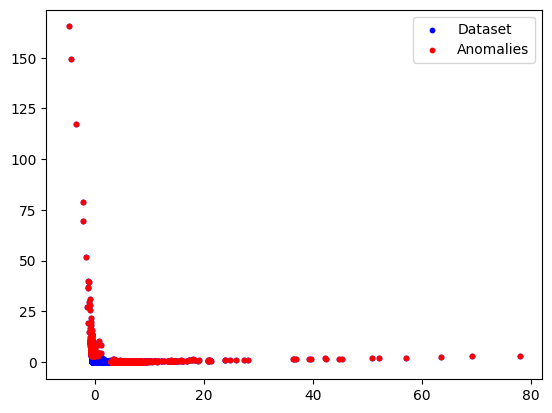

In [ ]:
plt.scatter(df_pcan.iloc[:, 0], df_pcan.iloc[:, 1], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(selected_rows01.iloc[:,0], selected_rows01.iloc[:,1], color='red', label='Anomalies',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
anomaly_f2=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==2:
    anomaly_f2.append(anomaly_row[i])
print(anomaly_f2)
print(len(anomaly_f2))


[439, 563, 1122, 1454, 2247, 3561, 3690, 3774, 7321, 8526, 8575, 9001, 9262, 9327, 9808, 9852, 11304, 11548, 11754, 11825, 12313, 12443, 12651, 13686, 13809, 14085, 14632, 14765, 15338, 16195, 16895, 17088, 17305, 17412, 17698, 18411, 18544, 18865, 19171, 19932, 20742, 21042, 21257, 21537, 21847, 22333, 22660, 23901, 24813, 25603, 25667, 26721, 27727, 28276, 28919, 29428, 30143, 30645, 30740, 31208, 31565, 32151, 33632, 33699, 35240, 35919, 37217, 37890, 38120, 38641, 38684, 38747, 39396, 39509, 39568, 39707, 40324, 40455, 41234, 41633, 41786, 41834, 41949, 42017, 42320, 42847, 43259, 43368, 43452, 44787, 45788, 45943, 46794, 46874, 47236, 47449, 47487, 47986, 48013, 48548, 49891, 50133, 51209, 51616, 52109, 52505, 52517, 52548, 53206, 54327, 54487, 54516, 55146, 55711, 56212, 56942, 57589, 57621, 57991, 58126, 58191, 58842, 58856, 59060, 59565, 59647, 59678, 59932, 61160, 61209, 61711, 61945, 62062, 63455, 64189, 64636, 64713, 64748, 65570, 66755, 69502, 69625, 70055, 70193, 70361, 71

In [ ]:
anomaly_f3=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==3:
    anomaly_f3.append(anomaly_row[i])
print(anomaly_f3)
print(len(anomaly_f3))

[9, 40, 105, 107, 166, 218, 224, 272, 382, 419, 535, 537, 673, 738, 806, 824, 952, 962, 991, 1033, 1053, 1131, 1153, 1208, 1314, 1342, 1546, 1569, 1629, 1660, 1721, 1775, 1862, 1872, 2015, 2091, 2318, 2368, 2392, 2407, 2446, 2532, 2559, 2578, 2815, 2836, 2862, 2923, 2996, 3164, 3236, 3252, 3272, 3397, 3403, 3496, 3503, 3574, 3781, 3833, 3905, 3940, 3945, 3950, 4014, 4083, 4310, 4370, 4437, 4481, 4495, 4776, 4881, 4900, 4948, 4996, 5103, 5135, 5155, 5205, 5313, 5375, 5422, 5579, 5616, 5691, 5773, 5955, 6021, 6037, 6150, 6177, 6180, 6233, 6256, 6355, 6394, 6450, 6572, 6694, 6703, 6815, 6888, 6897, 6952, 7006, 7122, 7126, 7223, 7238, 7248, 7281, 7321, 7365, 7418, 7586, 7707, 7716, 7734, 7740, 7807, 8059, 8077, 8232, 8243, 8343, 8401, 8407, 8477, 8584, 8585, 8595, 8621, 8782, 8819, 8822, 8864, 8960, 9101, 9179, 9200, 9205, 9241, 9273, 9357, 9385, 9409, 9413, 9529, 9659, 9708, 9731, 9780, 9862, 9891, 9955, 9986, 10025, 10033, 10078, 10110, 10147, 10321, 10337, 10437, 10613, 10765, 10777, 10

In [ ]:
array1=np.array(anomaly_f2)
array2=np.array(anomaly_f3)
union23 = np.union1d(array1, array2)

# Print the intersection
print(union23)
print(len(union23))


[    9    40   105 ... 99774 99910 99932]
1781


In [ ]:
selected_rows23 = data.iloc[union23]
selected_rows23

,0,1,2,3,4,5,6,7,8,9,10,11,12
9,-0.216427,0.224597,0.330285,-3.253774,0.051880,0.979066,-0.880887,-0.071416,-0.754457,1.955893,1.133872,-3.475169,-0.527313
40,-0.250161,0.315143,2.307440,-4.748763,-0.296763,-0.595184,-1.034462,0.368616,0.593472,0.017921,1.488771,-0.641276,-2.261178
105,-0.216204,0.279962,0.255936,-3.033038,1.177880,1.117454,-1.363484,-0.036450,-0.250202,1.508446,0.936792,-2.872600,-0.897009
107,-0.145197,0.312859,2.330218,-4.655474,-0.356763,0.622457,-0.077113,0.119458,0.036265,-0.962530,1.209397,-0.683844,-2.186369
166,0.037934,0.311845,2.341997,-4.616627,-0.386097,0.898285,0.413378,-0.079672,-0.391770,-0.709171,1.137894,-0.699199,-2.127601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99667,-0.164522,0.212412,0.829773,-3.049315,-0.141154,0.180395,-2.290383,0.565650,0.545791,0.970561,0.967851,-3.545133,-1.230708
99754,-0.215258,0.227633,0.333912,-3.109128,0.331531,2.272772,-0.291157,-0.181762,-0.893238,0.354751,0.794728,-3.339413,-0.590418
99774,2.371038,0.278797,-0.602189,-3.006053,0.099272,1.117204,-2.089139,0.488143,0.417342,0.079845,2.013078,-2.251694,-1.426063
99910,-0.161627,0.007082,3.385636,-0.781216,-1.448166,-0.681395,0.629301,-0.072247,-0.288148,0.036192,1.974410,2.229766,0.106199


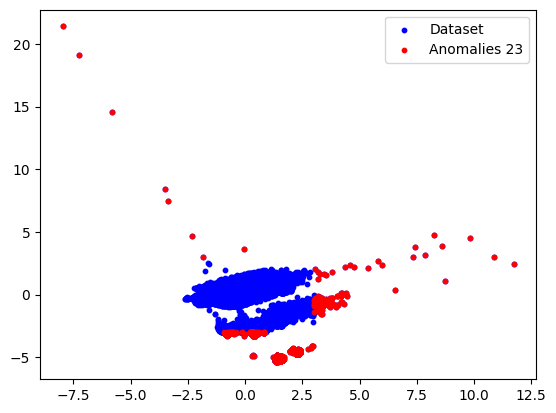

In [ ]:
plt.scatter(df_pcan.iloc[:, 2], df_pcan.iloc[:, 3], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(selected_rows23.iloc[:,2], selected_rows23.iloc[:,3], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
anomaly_f4=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==4:
    anomaly_f4.append(anomaly_row[i])
print(anomaly_f4)
print(len(anomaly_f4))

[259, 1983, 3070, 4833, 7291, 16870, 16881, 19443, 21448, 23725, 24103, 26543, 30517, 31746, 33735, 34117, 40595, 53843, 55318, 55594, 57160, 58126, 58213, 62556, 63465, 64243, 68326, 69169, 69463, 77440, 79969, 81293, 83868, 84541, 85261, 88498, 89750, 91494, 97178, 97943, 98381]
41


In [ ]:
anomaly_f5=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==5:
    anomaly_f5.append(anomaly_row[i])
print(anomaly_f5)
print(len(anomaly_f5))

[259, 394, 749, 1237, 1238, 1422, 1983, 2247, 2647, 3070, 3690, 4705, 5250, 6076, 6567, 6610, 7291, 7321, 7590, 7947, 8526, 8815, 9829, 9846, 9859, 11548, 12144, 12614, 13053, 13686, 13941, 15136, 15247, 16881, 18294, 19443, 20610, 21448, 21537, 22229, 22279, 22396, 22498, 23725, 23901, 24444, 24548, 24577, 24602, 25079, 25654, 26543, 26697, 27839, 27844, 28029, 28393, 28449, 28487, 28533, 29582, 29591, 30347, 31746, 32116, 33735, 34493, 35860, 36009, 36256, 36309, 36517, 36772, 36947, 37792, 37890, 37949, 38641, 38747, 38882, 38979, 39059, 39903, 40543, 40553, 40595, 40791, 41609, 42146, 42207, 42349, 42872, 43059, 43084, 43327, 45120, 45671, 45943, 46417, 46913, 47248, 47979, 48028, 49330, 49663, 49891, 51602, 51916, 52121, 52132, 52705, 53843, 53932, 53976, 54496, 54599, 54878, 55594, 56143, 56249, 56395, 56519, 57035, 58355, 58613, 58792, 59060, 59871, 61685, 62133, 62339, 62454, 62556, 62732, 62753, 63235, 63443, 64243, 64927, 65570, 65909, 67381, 67530, 67947, 69169, 69943, 69978

In [ ]:
anomaly_f6=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==6:
    anomaly_f6.append(anomaly_row[i])
print(anomaly_f6)
print(len(anomaly_f6))

[259, 439, 1634, 1983, 2247, 3070, 3836, 4041, 4833, 5970, 6287, 6786, 7073, 7291, 7321, 7712, 8526, 10701, 11362, 11493, 11548, 12729, 13686, 14437, 16341, 16870, 16881, 19443, 21448, 23725, 23901, 24103, 24135, 25292, 25670, 26543, 26999, 27207, 28473, 29171, 30416, 30517, 31521, 31746, 32151, 32555, 33735, 33743, 34117, 34122, 34650, 35927, 36104, 36186, 38171, 38641, 38730, 38747, 39653, 40595, 40686, 40859, 43159, 43635, 43732, 44218, 44918, 45534, 45943, 46232, 46313, 47398, 49369, 49891, 49902, 50114, 50906, 50953, 51616, 53206, 53567, 53843, 54327, 55318, 55440, 55564, 55594, 57160, 57896, 57991, 58213, 59932, 60882, 61201, 62556, 62910, 63465, 64243, 65371, 65468, 65955, 67900, 68326, 69169, 69463, 70015, 70434, 71255, 72546, 73036, 73863, 73942, 74757, 75134, 76733, 77171, 78476, 79502, 79778, 79969, 80096, 80795, 81293, 81477, 81489, 81843, 81966, 81981, 83268, 83868, 84541, 84763, 85261, 85377, 88498, 89111, 89244, 89750, 91166, 91238, 92407, 93286, 93298, 93574, 93844, 955

In [ ]:
anomaly_f7=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==7:
    anomaly_f7.append(anomaly_row[i])
print(anomaly_f7)
print(len(anomaly_f7))

[259, 1983, 3070, 4833, 7291, 16870, 16881, 19443, 21448, 23725, 24103, 26543, 30517, 31746, 33735, 34117, 40595, 53843, 55318, 55594, 57160, 58213, 62556, 63465, 64243, 68326, 69169, 69463, 79969, 81293, 83868, 84541, 85261, 88498, 89750, 97178, 98381]
37


In [ ]:
anomaly_f8=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==8:
    anomaly_f8.append(anomaly_row[i])
print(anomaly_f8)
print(len(anomaly_f8))

[259, 1983, 3070, 4833, 7291, 16870, 16881, 19443, 21448, 23725, 24103, 26543, 30517, 31746, 33735, 34117, 40595, 53843, 55318, 55594, 57160, 58213, 62556, 63465, 64243, 68326, 69169, 69463, 79969, 81293, 83868, 84541, 85261, 88498, 89750, 97178, 98381]
37


In [ ]:
anomaly_f9=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==9:
    anomaly_f9.append(anomaly_row[i])
print(anomaly_f9)
print(len(anomaly_f9))

[259, 16881, 23725, 27581, 28615, 48623, 52327, 55210, 58886, 69169, 71235, 81293, 86099, 88290, 97178]
15


In [ ]:
anomaly_f10=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==10:
    anomaly_f10.append(anomaly_row[i])
print(anomaly_f10)
print(len(anomaly_f10))

[259, 14063, 16881, 23725, 30518, 38747, 69169, 81293, 92397, 97337]
10


In [ ]:
anomaly_f11=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==11:
    anomaly_f11.append(anomaly_row[i])
print(anomaly_f11)
print(len(anomaly_f11))

[9, 78, 120, 285, 310, 382, 440, 445, 563, 609, 653, 938, 962, 984, 1033, 1062, 1123, 1236, 1253, 1405, 1569, 1721, 1782, 1813, 1939, 1948, 1986, 2083, 2289, 2368, 2405, 2480, 2482, 2491, 2529, 2537, 2614, 2847, 2862, 2872, 2923, 2953, 3031, 3228, 3277, 3300, 3397, 3403, 3421, 3836, 3950, 4014, 4288, 4370, 4409, 4415, 4452, 4463, 4522, 4693, 4734, 4746, 4776, 4952, 4965, 4996, 5077, 5135, 5183, 5279, 5289, 5293, 5313, 5375, 5538, 5620, 5647, 5661, 5690, 5691, 5734, 5739, 5756, 5869, 5883, 5932, 5955, 5987, 6034, 6066, 6147, 6177, 6218, 6233, 6285, 6394, 6620, 6653, 6694, 6809, 6815, 6952, 7194, 7223, 7258, 7365, 7716, 7770, 7943, 8059, 8122, 8221, 8232, 8407, 8477, 8634, 8734, 8819, 9001, 9055, 9071, 9177, 9184, 9202, 9385, 9431, 9466, 9529, 9657, 9659, 9734, 9782, 9862, 9891, 9957, 9986, 10021, 10147, 10233, 10300, 10311, 10321, 10332, 10337, 10396, 10437, 10566, 10638, 10738, 10791, 11005, 11081, 11107, 11110, 11141, 11176, 11471, 11485, 11499, 11502, 11625, 11724, 11980, 12038, 1204

In [ ]:
anomaly_f12=[]
for i in range(0,len(anomaly_col)):
  if anomaly_col[i]==12:
    anomaly_f12.append(anomaly_row[i])
print(anomaly_f12)
print(len(anomaly_f12))

[165, 1122, 1564, 2247, 2491, 5374, 6593, 7321, 7609, 7733, 8526, 8532, 8575, 8816, 10359, 11548, 11825, 12738, 13686, 18540, 21537, 21847, 22499, 22600, 25955, 27668, 29170, 29750, 30311, 31791, 31893, 32151, 32687, 34272, 34489, 35083, 35240, 36498, 37993, 38641, 38747, 40623, 42326, 43259, 43327, 44406, 44482, 44994, 45050, 45943, 47270, 47573, 47815, 50024, 50133, 50667, 51616, 52257, 52300, 52370, 52633, 53206, 57539, 57991, 58359, 60059, 60173, 60326, 62462, 64129, 65570, 65707, 69642, 71154, 71670, 75198, 76235, 77440, 78405, 78789, 81981, 85350, 85435, 86620, 86732, 86830, 87209, 89244, 90677, 91494, 92861, 93298, 94645, 94989, 96891, 97086, 97337, 97737, 97943, 99932]
100


In [ ]:
concatenated_array=anomaly_f0+anomaly_f1+anomaly_f2+anomaly_f3+anomaly_f4+anomaly_f5+anomaly_f6+anomaly_f7+anomaly_f8+anomaly_f9+anomaly_f10+anomaly_f11+anomaly_f12
print(concatenated_array)
print(len(concatenated_array))

[122, 175, 221, 340, 375, 439, 887, 897, 904, 957, 1122, 1167, 1196, 1481, 1727, 1738, 1749, 1828, 2051, 2247, 2320, 2523, 2926, 2941, 2959, 3016, 3138, 3365, 3404, 3467, 3473, 3554, 3573, 3597, 3633, 3690, 3718, 3729, 3744, 3932, 4009, 4026, 4159, 4259, 4309, 4356, 4458, 4498, 4727, 4997, 5056, 5103, 5212, 5233, 5473, 5727, 5840, 5858, 5880, 5920, 6454, 6516, 6593, 6728, 6732, 7138, 7146, 7321, 7381, 7422, 7491, 7911, 8012, 8021, 8091, 8109, 8278, 8360, 8417, 8526, 8537, 8560, 8575, 8674, 8747, 8783, 8930, 8964, 9038, 9057, 9198, 9641, 9658, 9707, 9848, 10030, 10174, 10236, 10464, 10519, 10521, 10684, 10851, 10927, 10929, 10978, 10997, 11012, 11132, 11265, 11282, 11381, 11415, 11548, 11659, 11722, 11772, 11776, 11825, 11855, 11931, 11945, 11996, 12036, 12042, 12050, 12056, 12150, 12396, 12502, 12774, 12795, 12804, 12855, 12882, 13045, 13072, 13168, 13338, 13417, 13474, 13578, 13618, 13635, 13673, 13686, 14005, 14041, 14252, 14289, 14319, 14399, 14497, 14658, 14779, 14995, 15239, 15338

In [ ]:
from collections import Counter

frequency = Counter(concatenated_array)

unique_elements = list(frequency.keys())
frequencies = list(frequency.values())

print(unique_elements) 
print(frequencies) 

[122, 175, 221, 340, 375, 439, 887, 897, 904, 957, 1122, 1167, 1196, 1481, 1727, 1738, 1749, 1828, 2051, 2247, 2320, 2523, 2926, 2941, 2959, 3016, 3138, 3365, 3404, 3467, 3473, 3554, 3573, 3597, 3633, 3690, 3718, 3729, 3744, 3932, 4009, 4026, 4159, 4259, 4309, 4356, 4458, 4498, 4727, 4997, 5056, 5103, 5212, 5233, 5473, 5727, 5840, 5858, 5880, 5920, 6454, 6516, 6593, 6728, 6732, 7138, 7146, 7321, 7381, 7422, 7491, 7911, 8012, 8021, 8091, 8109, 8278, 8360, 8417, 8526, 8537, 8560, 8575, 8674, 8747, 8783, 8930, 8964, 9038, 9057, 9198, 9641, 9658, 9707, 9848, 10030, 10174, 10236, 10464, 10519, 10521, 10684, 10851, 10927, 10929, 10978, 10997, 11012, 11132, 11265, 11282, 11381, 11415, 11548, 11659, 11722, 11772, 11776, 11825, 11855, 11931, 11945, 11996, 12036, 12042, 12050, 12056, 12150, 12396, 12502, 12774, 12795, 12804, 12855, 12882, 13045, 13072, 13168, 13338, 13417, 13474, 13578, 13618, 13635, 13673, 13686, 14005, 14041, 14252, 14289, 14319, 14399, 14497, 14658, 14779, 14995, 15239, 15338

In [ ]:
z_score_anomaly=[]
for i in range(0,len(frequencies)):
  if frequencies[i]>=2:
    z_score_anomaly.append(unique_elements[i])
print(z_score_anomaly)
print(len(z_score_anomaly))

[439, 1122, 2247, 3690, 5103, 6593, 7321, 8526, 8575, 11548, 11825, 12795, 13686, 15338, 16895, 17305, 17835, 21537, 21847, 22600, 23901, 27668, 29750, 32151, 35240, 37217, 38641, 38747, 39195, 41834, 42017, 43259, 43327, 45050, 45943, 47270, 47815, 49891, 50024, 50133, 50667, 51209, 51616, 53206, 54327, 54516, 56942, 57991, 58359, 59060, 59932, 60326, 62462, 64189, 65570, 69642, 70055, 70193, 71255, 75198, 75287, 77440, 78405, 78476, 81981, 85350, 85435, 86620, 88290, 90865, 91494, 93298, 94645, 96891, 97337, 97831, 97943, 99932, 563, 609, 1123, 1939, 2289, 2491, 3836, 5690, 5734, 5869, 5987, 6620, 9071, 9431, 12651, 13053, 13714, 14325, 14697, 15247, 15790, 16862, 19173, 19915, 20372, 22498, 23735, 23945, 25528, 26466, 26583, 27408, 29364, 30481, 32004, 34493, 34650, 35954, 36104, 36186, 37149, 37758, 37871, 37890, 38346, 38693, 39166, 40396, 41627, 42121, 42162, 43516, 43804, 44332, 44933, 45120, 45430, 46215, 46320, 46919, 46976, 48548, 49740, 51343, 51659, 53854, 54509, 54886, 560

In [ ]:
z_score_anomaly_dataset=data.iloc[z_score_anomaly]
z_score_anomaly_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
439,14.324247,0.590301,4.387965,0.047979,0.561750,-1.543039,3.802124,-0.861460,-0.539439,-1.562654,0.869880,2.193969,2.984542
1122,28.059912,0.955499,4.382064,2.226843,1.019276,-2.275907,2.627853,-0.305174,0.500486,-1.711699,-2.362501,-0.183265,4.507155
2247,69.147544,2.780414,11.727094,2.465687,2.048190,-5.843819,5.302020,-0.548760,0.890140,-2.324981,-2.535063,-2.936097,13.106940
3690,14.577898,0.565677,4.022038,-0.125447,0.780080,-3.764212,2.899372,-0.597326,0.284409,-0.250200,1.063002,1.937647,2.383894
5103,3.760756,0.343630,-0.145956,-3.008669,-0.253911,0.252982,-2.160724,0.615643,0.618280,0.372834,1.967515,-2.584913,-0.613708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97178,-0.236615,-0.155496,-1.271190,-0.262769,-4.854098,16.755683,22.890360,14.725783,38.811471,14.987602,2.084159,-0.443950,-0.195253
98381,-0.437676,-0.131669,-0.032272,1.420718,10.875928,-2.863049,7.910563,50.965868,-20.936294,-1.396538,1.781895,0.010684,-0.888045
72546,-0.341383,-0.044454,1.360461,-1.350059,-0.682355,-3.060223,3.376921,-0.761672,-0.645932,0.378378,1.054917,0.531809,-1.262681
73036,-0.340178,-0.021496,1.381130,-1.354724,-0.667576,-3.108134,3.124359,-0.628910,-0.360259,-0.029334,1.059547,0.533326,-1.266917


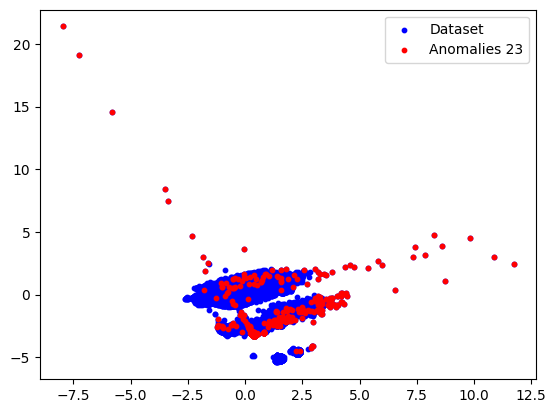

In [ ]:
plt.scatter(df_pcan.iloc[:, 2], df_pcan.iloc[:, 3], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(z_score_anomaly_dataset.iloc[:,2], z_score_anomaly_dataset.iloc[:,3], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
z_score_anomaly=[]
for i in range(0,len(frequencies)):
  if frequencies[i]>=3:
    z_score_anomaly.append(unique_elements[i])
print(z_score_anomaly)
print(len(z_score_anomaly))

[439, 1122, 2247, 3690, 7321, 8526, 8575, 11548, 11825, 13686, 21537, 21847, 23901, 32151, 35240, 38641, 38747, 42017, 43259, 43327, 45943, 49891, 50133, 51209, 51616, 53206, 54327, 57991, 59060, 59932, 64189, 65570, 70193, 71255, 75198, 77440, 78476, 81981, 85435, 88290, 91494, 93298, 97337, 97943, 99932, 563, 2491, 3836, 12651, 13053, 15247, 22498, 34493, 34650, 36104, 36186, 37890, 38693, 45120, 46320, 48548, 58126, 69625, 70015, 70385, 76479, 77171, 81966, 82321, 83268, 89244, 98508, 259, 1983, 3070, 4833, 7291, 16870, 16881, 19443, 21448, 23725, 24103, 26543, 30517, 31746, 33735, 34117, 40595, 53843, 55318, 55594, 57160, 58213, 62556, 63465, 64243, 68326, 69169, 69463, 79969, 81293, 83868, 84541, 85261, 88498, 89750, 97178, 98381]
109


In [ ]:
z_score_anomaly_dataset=data.iloc[z_score_anomaly]
z_score_anomaly_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
439,14.324247,0.590301,4.387965,0.047979,0.561750,-1.543039,3.802124,-0.861460,-0.539439,-1.562654,0.869880,2.193969,2.984542
1122,28.059912,0.955499,4.382064,2.226843,1.019276,-2.275907,2.627853,-0.305174,0.500486,-1.711699,-2.362501,-0.183265,4.507155
2247,69.147544,2.780414,11.727094,2.465687,2.048190,-5.843819,5.302020,-0.548760,0.890140,-2.324981,-2.535063,-2.936097,13.106940
3690,14.577898,0.565677,4.022038,-0.125447,0.780080,-3.764212,2.899372,-0.597326,0.284409,-0.250200,1.063002,1.937647,2.383894
7321,77.958016,3.066108,10.892139,3.009866,1.622641,-5.025594,4.494904,-0.439094,0.870358,-2.171857,-0.798338,-1.724478,9.181051
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85261,-0.467782,-0.038590,2.139372,1.587137,9.696056,-2.452463,3.171924,52.231537,-19.691380,0.497553,0.606172,2.189179,-1.089976
88498,-0.370487,-0.031577,0.022608,1.358321,10.948015,-3.858917,6.704322,51.426027,-19.926388,-1.568745,1.983246,0.052903,-0.919359
89750,-0.235837,-0.009447,0.704992,0.989043,9.699040,-2.855275,6.101515,51.338937,-21.194041,1.303877,0.401821,1.074200,-0.729768
97178,-0.236615,-0.155496,-1.271190,-0.262769,-4.854098,16.755683,22.890360,14.725783,38.811471,14.987602,2.084159,-0.443950,-0.195253


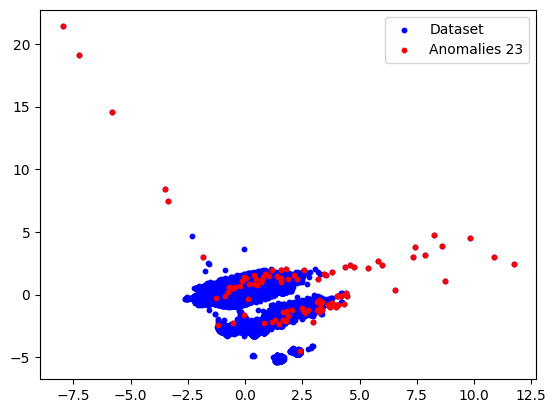

In [ ]:
plt.scatter(df_pcan.iloc[:, 2], df_pcan.iloc[:, 3], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(z_score_anomaly_dataset.iloc[:,2], z_score_anomaly_dataset.iloc[:,3], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

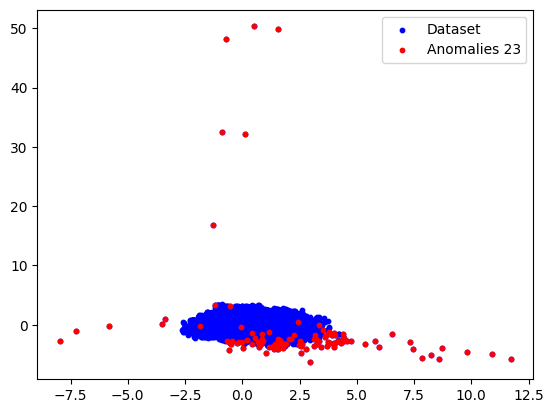

In [ ]:
plt.scatter(df_pcan.iloc[:, 2], df_pcan.iloc[:, 5], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(z_score_anomaly_dataset.iloc[:,2], z_score_anomaly_dataset.iloc[:,5], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
rem_anom_zscore = df_pcan.drop(z_score_anomaly)

# Print the resulting DataFrame
rem_anom_zscore

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.341015,-0.133768,-0.500539,0.916542,0.217394,-0.583810,-0.204231,0.084114,0.562880,-0.730501,1.500027,0.037200,-0.928394
1,0.100845,-0.016431,0.803803,0.783208,-0.489864,-0.480943,1.161791,-0.273102,-0.397080,-0.144436,0.620078,-1.479718,0.164719
2,-0.124307,-0.092143,0.319794,0.350615,0.599174,-1.398717,-0.257549,0.035634,0.533330,0.736999,-1.701240,-0.440695,-1.192758
3,-0.410725,-0.093763,0.338919,-0.345302,-1.138605,0.063479,-0.085566,0.170903,-0.206625,0.196450,-0.542706,-0.707714,1.260248
4,-0.311292,-0.079836,-0.416176,-0.199919,0.580143,-1.161144,0.314314,-0.135555,0.133491,0.781418,-1.162239,-0.577898,0.028440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.187823,-0.106998,2.055171,1.366937,0.499290,0.183307,-2.049120,0.384377,0.843458,0.218273,1.167754,0.456223,0.367522
99996,-0.281182,-0.071966,0.069902,0.894722,1.284397,-1.143501,1.027179,-0.201958,0.726976,-1.603708,-0.080293,-1.315323,-1.059576
99997,-0.201428,-0.108355,-1.703600,-0.322194,0.478405,-0.098335,-0.724034,0.219898,0.597211,-0.457472,0.171961,0.853628,0.012009
99998,-0.340470,-0.115788,0.587448,1.010636,1.733453,0.525020,0.221539,-0.360028,0.068721,-0.408018,0.717750,0.100217,0.344502


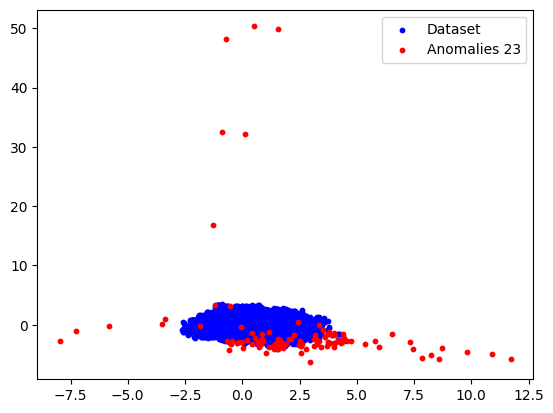

In [ ]:
plt.scatter(rem_anom_zscore.iloc[:, 2], rem_anom_zscore.iloc[:, 5], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(z_score_anomaly_dataset.iloc[:,2], z_score_anomaly_dataset.iloc[:,5], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

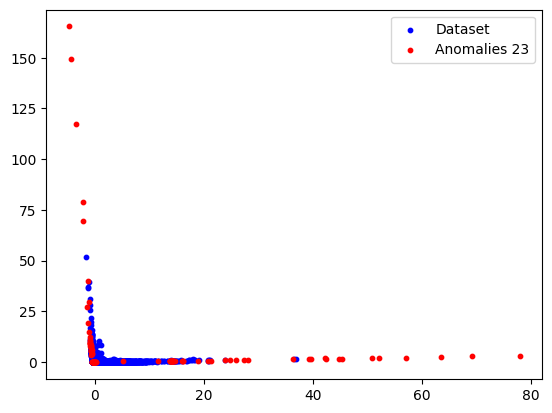

In [ ]:
plt.scatter(rem_anom_zscore.iloc[:, 0], rem_anom_zscore.iloc[:, 1], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(z_score_anomaly_dataset.iloc[:,0], z_score_anomaly_dataset.iloc[:,1], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

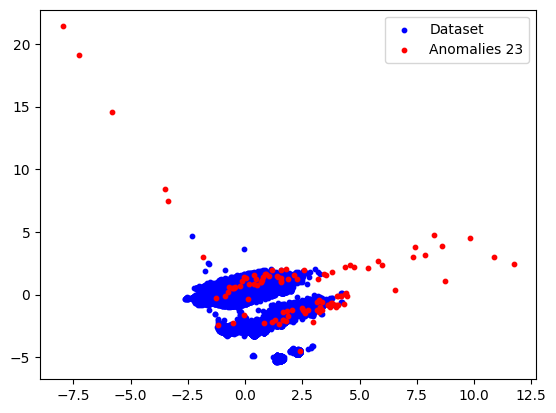

In [ ]:
plt.scatter(rem_anom_zscore.iloc[:, 2], rem_anom_zscore.iloc[:, 3], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(z_score_anomaly_dataset.iloc[:,2], z_score_anomaly_dataset.iloc[:,3
                                                                            ], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()

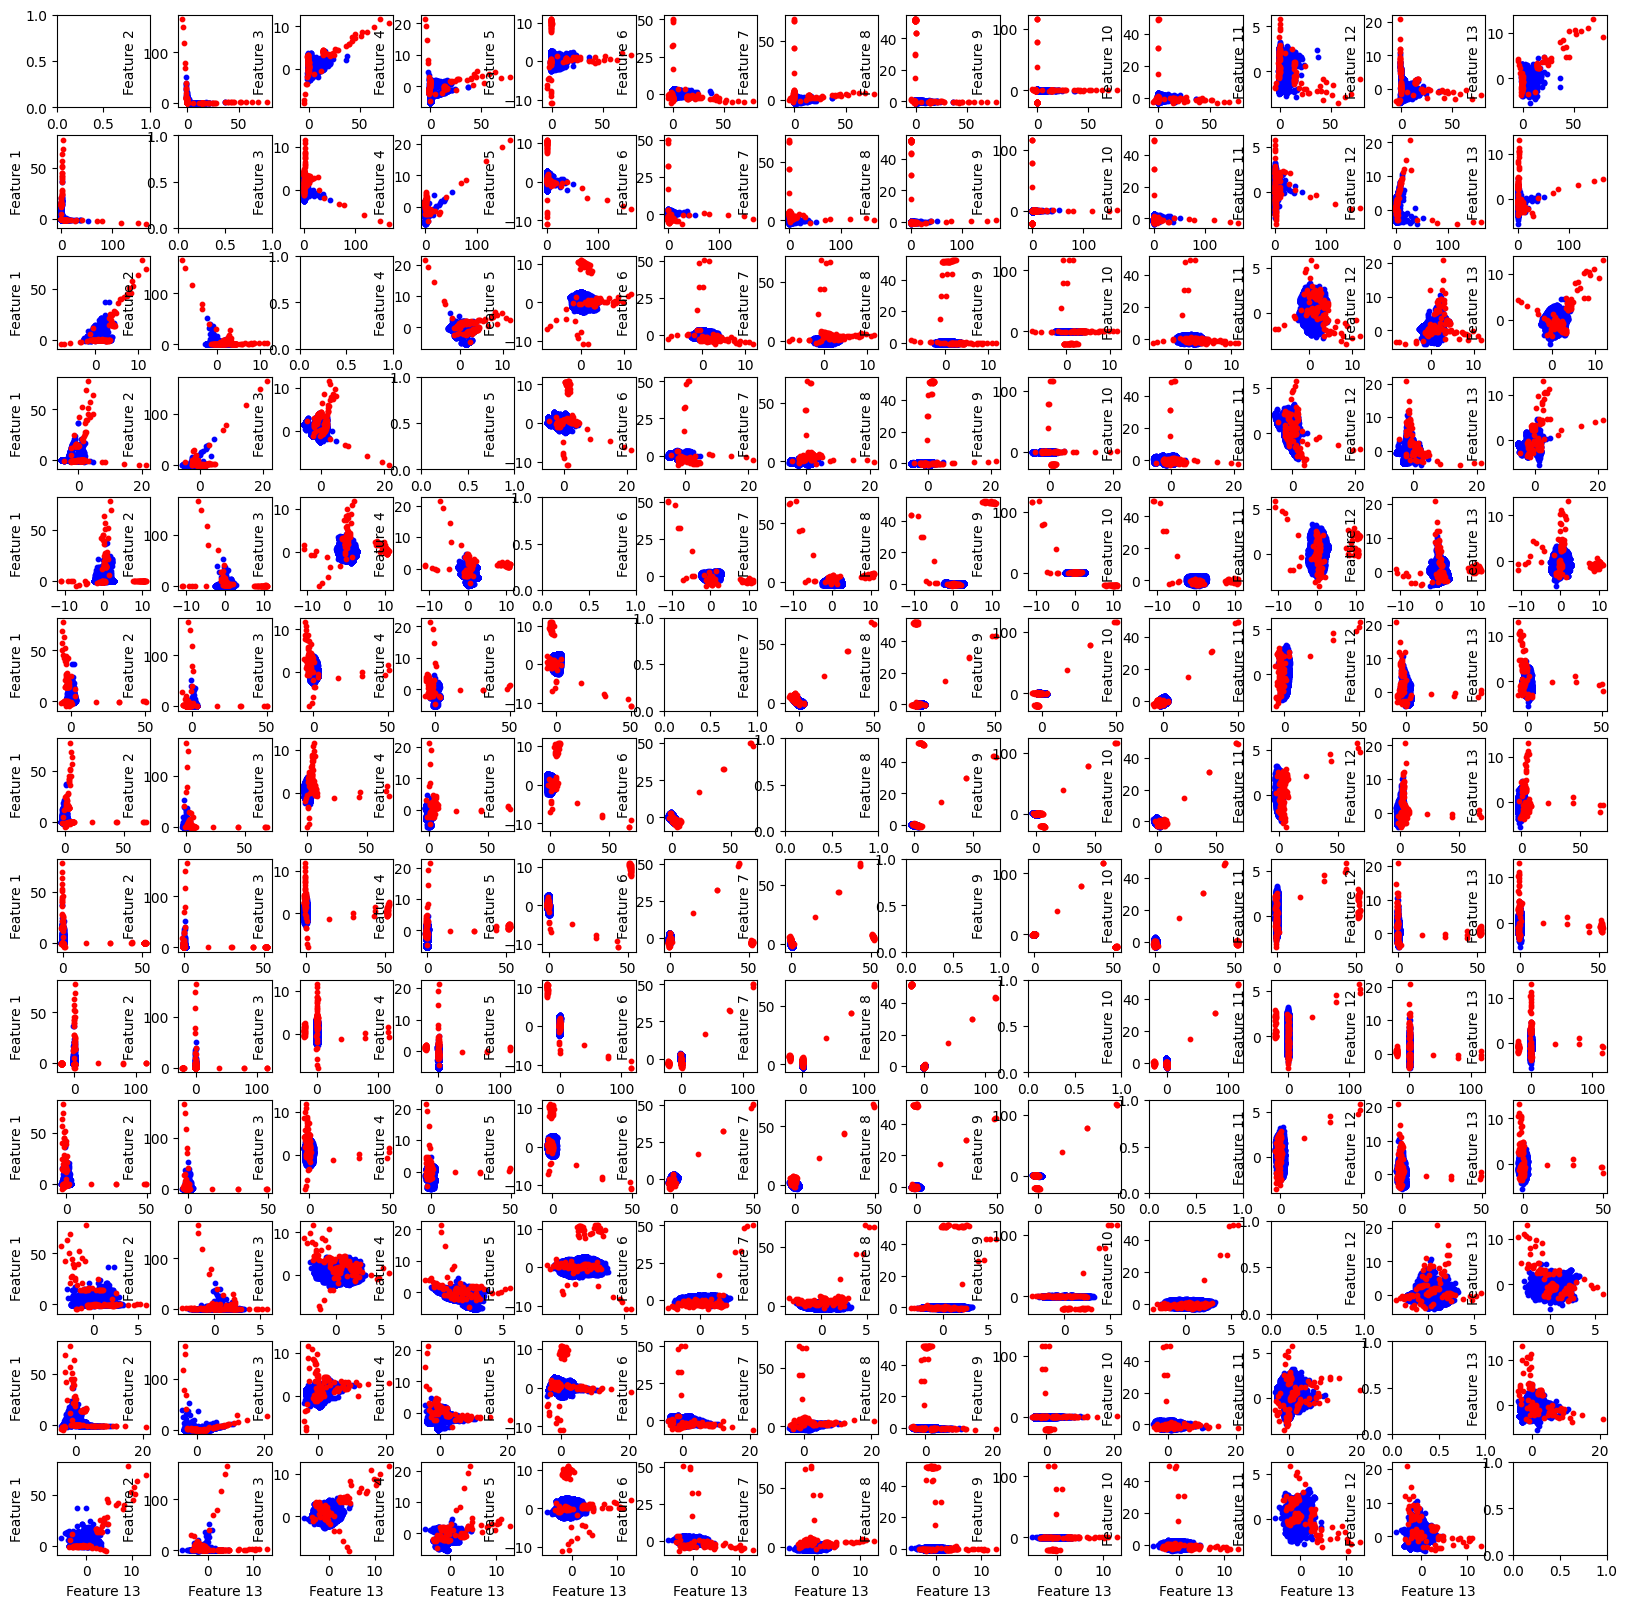

In [ ]:
# Create a 13x13 grid of subplots
fig, axs = plt.subplots(13, 13, figsize=(20, 20))

# Loop over all possible pairs of two features
for i in range(0, 13):
    for j in range(0, 13):
        if i != j:
            # Scatter plot the two features with red points for anomaly_flags and blue points otherwise
            axs[i, j].scatter(rem_anom_zscore.iloc[:, i], rem_anom_zscore.iloc[:, j], color='blue', label='Dataset',s=10)
            axs[i, j].scatter(z_score_anomaly_dataset.iloc[:,i], z_score_anomaly_dataset.iloc[:,j], color='red', label='Anomalies 23',s=10)
            axs[i, j].set_xlabel('Feature ' + str(i + 1))
            axs[i, j].set_ylabel('Feature ' + str(j + 1))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

In [ ]:
union_set = set(anomaly_f0).union(set(anomaly_f1), set(anomaly_f2), set(anomaly_f3), set(anomaly_f4), set(anomaly_f5), set(anomaly_f6), set(anomaly_f7), set(anomaly_f8), set(anomaly_f9), set(anomaly_f10), set(anomaly_f11), set(anomaly_f12))
union_array = list(union_set)

print(union_array)
print(len(union_array))

[73728, 24577, 9, 73739, 24589, 24602, 65564, 8221, 40989, 81952, 40994, 65570, 57382, 40, 8232, 16426, 65579, 81963, 16429, 81966, 32812, 8243, 16436, 90163, 16438, 32825, 98362, 90171, 81981, 24640, 32839, 24648, 98381, 78, 24656, 65618, 82005, 8278, 57429, 16470, 24667, 49246, 49250, 90210, 49251, 41061, 73828, 16487, 49257, 105, 107, 8300, 65645, 24686, 41071, 24688, 49262, 73834, 49269, 32887, 120, 49273, 122, 57466, 98426, 49278, 90241, 82051, 98439, 82056, 57480, 73866, 73863, 82060, 82065, 8343, 82077, 41118, 32926, 49311, 49310, 73891, 32932, 32931, 73894, 166, 8360, 165, 90282, 24747, 65707, 16558, 175, 41134, 82094, 98482, 49330, 24753, 32951, 82115, 57539, 16582, 24775, 41160, 98505, 98508, 32973, 8401, 82130, 98513, 73940, 73942, 8407, 32985, 32986, 218, 24794, 221, 49369, 224, 8417, 32995, 41190, 98537, 82154, 82156, 24813, 73970, 41203, 57589, 33017, 57594, 24827, 73983, 82175, 259, 90372, 49414, 65802, 33035, 24844, 65805, 90384, 272, 41234, 41233, 98576, 57621, 57620, 

In [ ]:
unionall = data.iloc[union_array]
unionall

,0,1,2,3,4,5,6,7,8,9,10,11,12
73728,5.197141,0.092992,0.481791,0.651892,-1.613301,-0.229825,0.355942,-0.074357,-0.804630,1.406196,-0.306248,0.328338,-0.229555
24577,0.768579,0.523504,-1.055196,-2.560804,1.908668,3.325151,-0.340508,-0.518249,-1.056090,0.347131,1.279825,-1.302283,-1.988536
9,-0.216427,0.224597,0.330285,-3.253774,0.051880,0.979066,-0.880887,-0.071416,-0.754457,1.955893,1.133872,-3.475169,-0.527313
73739,-0.504573,0.240106,2.726518,-0.780991,0.362060,-0.842210,0.350272,-0.206557,0.186210,-0.016892,1.923175,3.140594,-0.102954
24589,3.407663,0.789834,-0.278465,-2.763140,0.090851,2.099592,-1.194426,0.357711,0.178674,-1.426956,1.543813,-2.373051,-0.833058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73717,20.909330,0.643660,1.592626,1.267509,-1.328240,-1.702864,0.034853,0.364258,0.476624,-0.033254,0.501955,0.799128,1.459548
65528,-0.141934,0.379724,2.225404,-4.663972,-0.394681,0.019446,0.468925,-0.331087,-0.919179,1.582552,1.366207,-0.671013,-2.190256
98300,-0.452710,-0.050370,1.750672,-1.191427,-0.865701,-0.950845,3.547438,-0.690681,-0.769119,-1.796375,0.971653,0.871489,-0.806258
16381,3.899448,0.336957,-0.592404,-2.880060,0.225984,0.779041,-1.977246,0.314014,0.117186,1.179639,2.178308,-2.060224,-1.666315


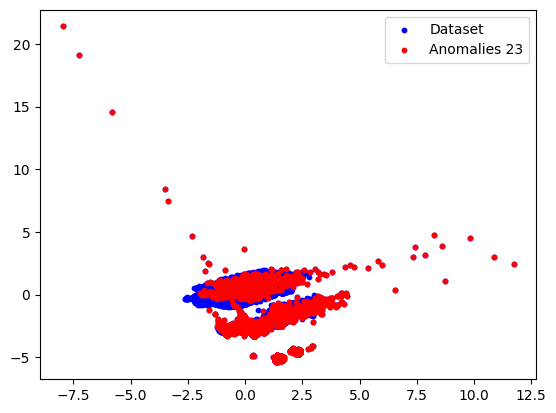

In [ ]:
plt.scatter(df_pcan.iloc[:, 2], df_pcan.iloc[:, 3], color='blue', label='Dataset',s=10)

# Plot the second dataset on the same graph
plt.scatter(unionall.iloc[:,2], unionall.iloc[:,3], color='red', label='Anomalies 23',s=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()